In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# All 8 CSV file paths containing the dice scores
filepaths = ["dataframeFlairBiasToTumourSeg.csv", "dataframeT1BiasToTumourSeg.csv", "dataframeT2BiasToTumourSeg.csv",
             "dataframeDTIEddyFAToTumourSeg.csv", "dataframeDTIEddyMDToTumourSeg.csv", "dataframeASLToTumourSeg.csv",
             "dataframeSWIBiasToTumourSeg.csv", "dataframeT1cBiasToTumourSeg.csv"]
dfs = [pd.read_csv(filepath) for filepath in filepaths]

In [6]:
result_df = pd.concat(dfs, axis=1)
result_df.tail(5)

,DS Flair Bias,DS T1 Bias,DS T2 Bias,DS DTI Eddy FA,DS DTI Eddy MD,DS ASL,DS SWI Bias,DS T1c Bias
112,0.922374,0.936988,0.935959,0.928654,0.926579,0.938260,0.932061,0.961281
113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114,0.927086,0.916089,0.918219,0.927594,0.923559,0.921565,0.921597,0.946865
115,0.683064,0.916764,0.847181,0.324985,0.910588,0.922492,0.819006,0.971743
116,0.571005,0.749320,0.764932,0.179351,0.071893,0.802520,0.611984,0.922761


In [7]:
result_df.head(5)

,DS Flair Bias,DS T1 Bias,DS T2 Bias,DS DTI Eddy FA,DS DTI Eddy MD,DS ASL,DS SWI Bias,DS T1c Bias
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.914389,0.881669,0.913246,0.909925,0.908140,0.921296,0.905765,0.975276
2,0.861798,0.858719,0.863941,0.872513,0.712055,0.858675,0.854479,0.939742
3,0.909265,0.917360,0.891723,0.915701,0.909477,0.913203,0.903746,0.969100
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# Drop rows where all values are 0
updated_df = result_df
updated_df = updated_df[updated_df.ne(0).any(axis=1)]
updated_df.head(10)

,DS Flair Bias,DS T1 Bias,DS T2 Bias,DS DTI Eddy FA,DS DTI Eddy MD,DS ASL,DS SWI Bias,DS T1c Bias
1,0.914389,0.881669,0.913246,0.909925,0.908140,0.921296,0.905765,0.975276
2,0.861798,0.858719,0.863941,0.872513,0.712055,0.858675,0.854479,0.939742
3,0.909265,0.917360,0.891723,0.915701,0.909477,0.913203,0.903746,0.969100
6,0.971820,0.979563,0.975593,0.971910,0.977932,0.976145,0.979681,0.987679
7,0.887475,0.893096,0.890450,0.894119,0.885104,0.901302,0.893261,0.904942
9,0.910753,0.877170,0.906752,0.896053,0.887579,0.912773,0.902492,0.952282
10,0.603048,0.000015,0.448975,0.636927,0.044013,0.699941,0.645820,0.908766
11,0.885573,0.880738,0.882953,0.863411,0.865098,0.911413,0.894299,0.952540
12,0.861437,0.738676,0.881778,0.878632,0.876787,0.890761,0.868308,0.946646
14,0.958196,0.966429,0.960384,0.957844,0.963830,0.966936,0.934774,0.981173


In [9]:
updated_df.tail(10)

,DS Flair Bias,DS T1 Bias,DS T2 Bias,DS DTI Eddy FA,DS DTI Eddy MD,DS ASL,DS SWI Bias,DS T1c Bias
103,0.789908,0.924877,0.896477,0.844659,0.706805,0.855830,0.061747,0.894631
104,0.456651,0.780001,0.336500,0.841126,0.784477,0.823045,0.536555,0.857391
105,0.883021,0.875463,0.876610,0.881189,0.871896,0.879820,0.871396,0.923438
106,0.924926,0.937749,0.942201,0.929053,0.942369,0.939669,0.934566,0.972421
107,0.887024,0.904703,0.914952,0.886975,0.910380,0.904031,0.889654,0.961653
108,0.936163,0.929938,0.932989,0.928884,0.927906,0.933571,0.926033,0.968806
112,0.922374,0.936988,0.935959,0.928654,0.926579,0.938260,0.932061,0.961281
114,0.927086,0.916089,0.918219,0.927594,0.923559,0.921565,0.921597,0.946865
115,0.683064,0.916764,0.847181,0.324985,0.910588,0.922492,0.819006,0.971743
116,0.571005,0.749320,0.764932,0.179351,0.071893,0.802520,0.611984,0.922761


In [45]:
# Melt the dataframe to long format
melted_df = updated_df.melt(var_name="Modality", value_name="Dice")

# Filter out any NaN values that may result from melting
melted_df = melted_df.dropna()

In [46]:
melted_df

,Modality,Dice
0,DS Flair Bias,0.914389
1,DS Flair Bias,0.861798
2,DS Flair Bias,0.909265
3,DS Flair Bias,0.971820
4,DS Flair Bias,0.887475
...,...,...
507,DS T1c Bias,0.968806
508,DS T1c Bias,0.961281
509,DS T1c Bias,0.946865
510,DS T1c Bias,0.971743


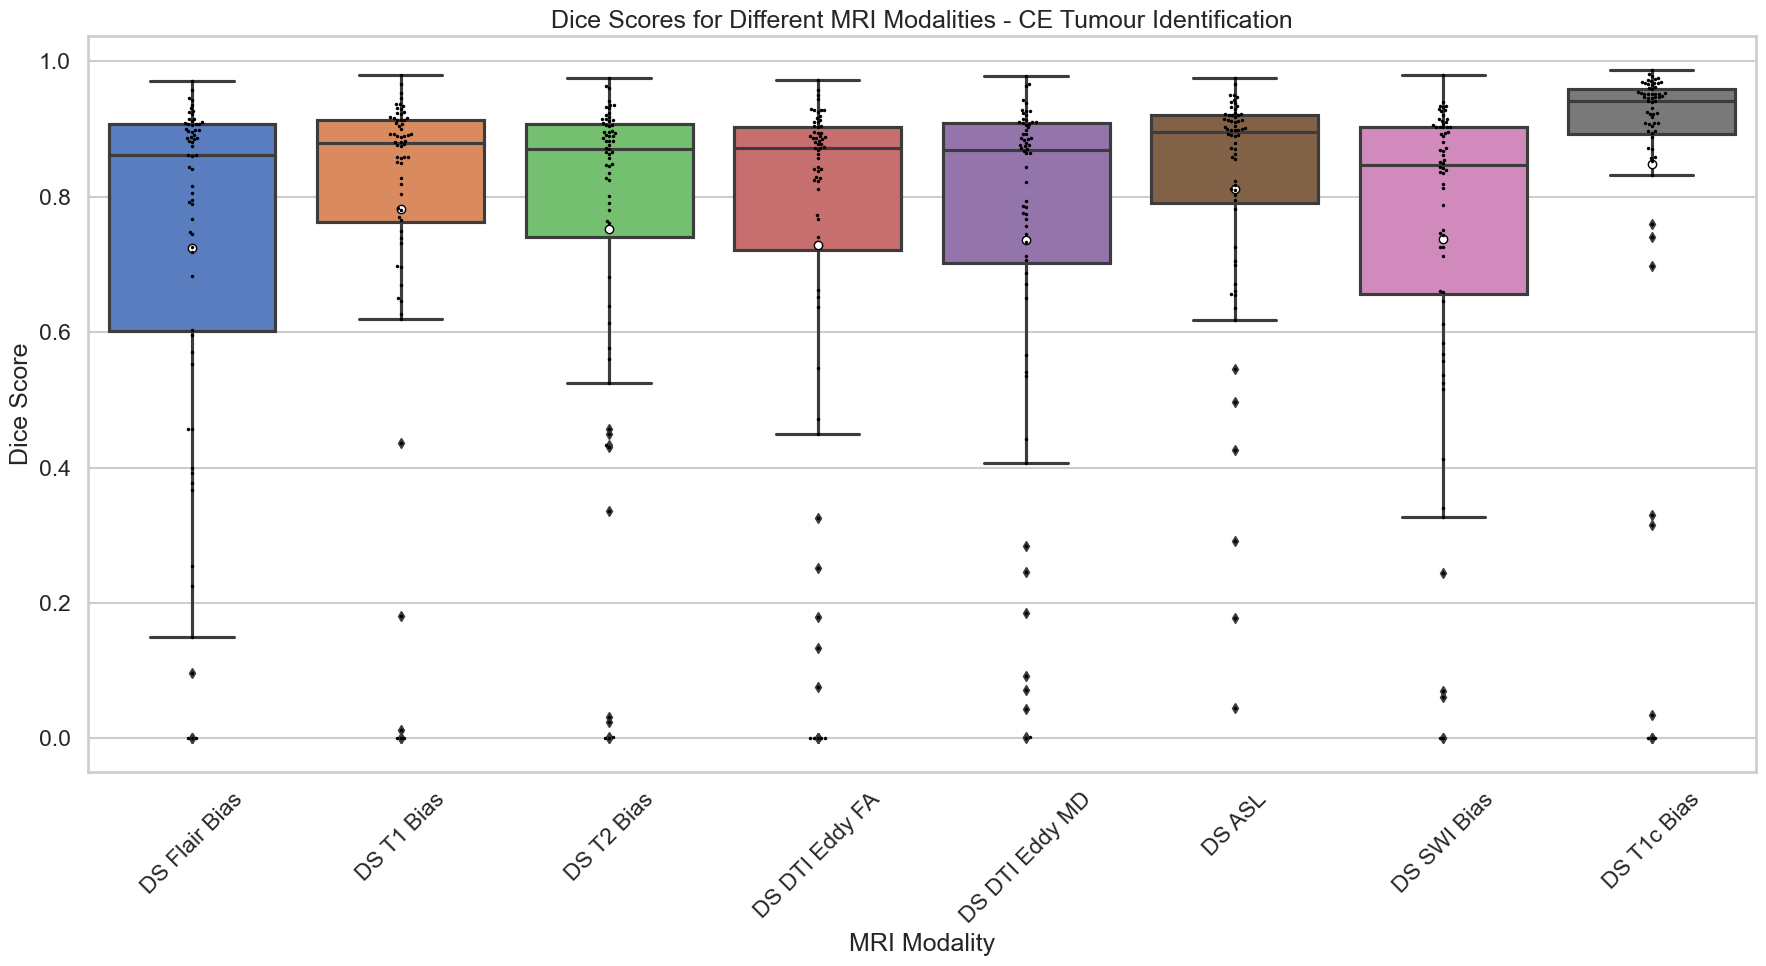

In [47]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=melted_df, x='Modality', y='Dice', palette='muted', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
sns.swarmplot(data=melted_df, x='Modality', y='Dice', color='black', size=2.5)


plt.title('Dice Scores for Different MRI Modalities - CE Tumour Identification')
plt.ylabel('Dice Score')
plt.xlabel('MRI Modality')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

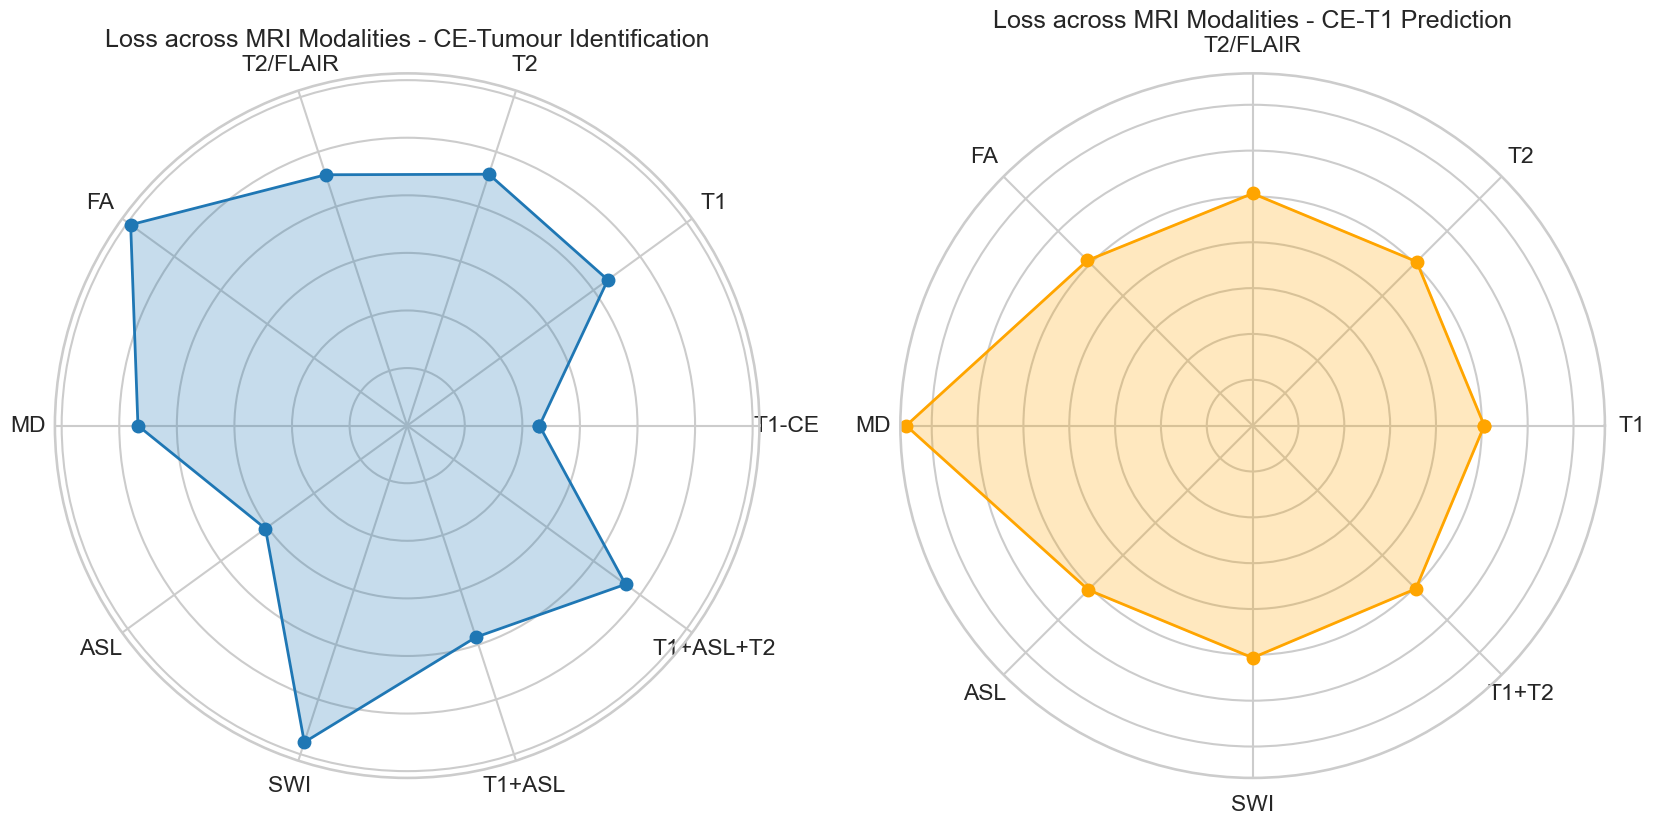

In [48]:
# Define data
label_tumour_seg = ["T1-CE", "T1", "T2", "T2/FLAIR", "FA", "MD", "ASL", "SWI", "T1+ASL", "T1+ASL+T2"]
loss_tumour_seg = [0.004593843, 0.008613954, 0.009181632, 0.009162759, 0.011871704,
        0.009351098, 0.006084108, 0.011562707, 0.007726193, 0.009375039]

label_t1c = ["T1", "T2", "T2/FLAIR", "FA", "MD", "ASL", "SWI", "T1+T2"]
loss_t1c = [0.126335993, 0.126489386, 0.126624793, 0.12740764, 
            0.188964084, 0.126698762, 0.126608655, 0.125854507]

# Define the angles for the radar chart, one for each attribute
angles1 = np.linspace(0, 2 * np.pi, len(label_tumour_seg), endpoint=False)
angles2 = np.linspace(0, 2 * np.pi, len(label_t1c), endpoint=False)

# Ensure the plot is circular, the data for the first attribute is duplicated at the end
loss_tumour_seg = np.concatenate((loss_tumour_seg, [loss_tumour_seg[0]]))
loss_t1c = np.concatenate((loss_t1c, [loss_t1c[0]]))
angles1 = np.concatenate((angles1, [angles1[0]]))
angles2 = np.concatenate((angles2, [angles2[0]]))

# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), subplot_kw=dict(polar=True))

# Plotting for the first radar chart
axs[0].plot(angles1, loss_tumour_seg, '-o', linewidth=2, label="CE-Tumour Identification")
axs[0].fill(angles1, loss_tumour_seg, alpha=0.25)
axs[0].set_yticklabels([])
axs[0].set_xticks(angles1[:-1])
axs[0].set_xticklabels(label_tumour_seg)
axs[0].set_title("Loss across MRI Modalities - CE-Tumour Identification")

# Plotting for the second radar chart
axs[1].plot(angles2, loss_t1c, '-o', linewidth=2, color="orange", label="CE-T1 Prediction")
axs[1].fill(angles2, loss_t1c, alpha=0.25, color="orange")
axs[1].set_yticklabels([])
axs[1].set_xticks(angles2[:-1])
axs[1].set_xticklabels(label_t1c)
axs[1].set_title("Loss across MRI Modalities - CE-T1 Prediction")

plt.show()


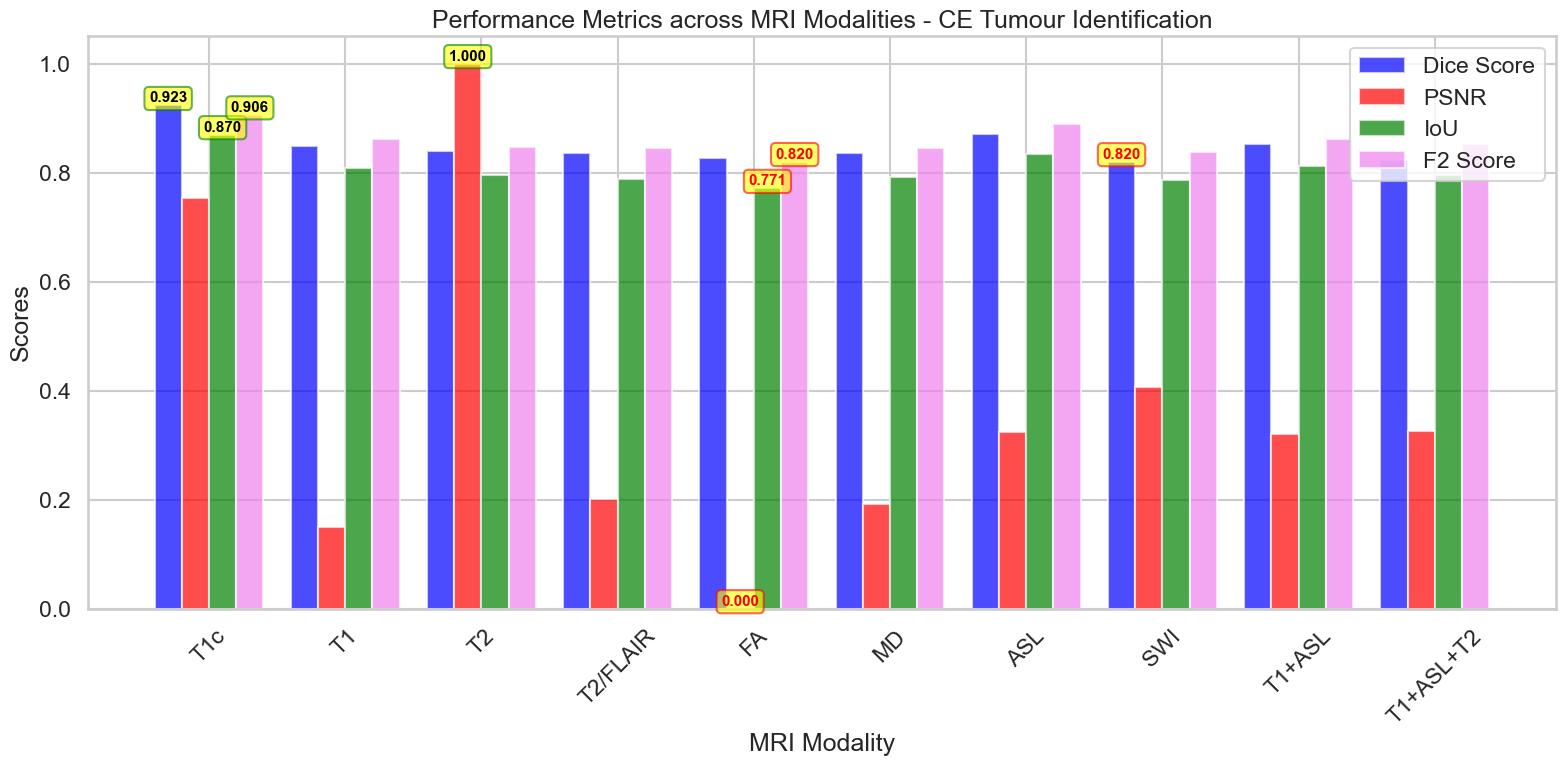

In [49]:
# Define data
labels = ["T1c", "T1", "T2", "T2/FLAIR", "FA", "MD", "ASL", "SWI", "T1+ASL", "T1+ASL+T2"]

dice_scores = [0.923160791, 0.848762453, 0.840190768, 0.836364865, 0.826800168, 
               0.835350394, 0.871505797, 0.820056021, 0.851718843, 0.822508991]

psnr_scores = [74.96113771, 68.42549542, 77.63102044, 68.97854895, 66.79157076, 
               68.87436669, 70.3098744, 71.20887545, 70.25605223, 70.3216274]

iou_scores = [0.869627379, 0.808101019, 0.796178088, 0.788804539, 0.771095369,
             0.791590499, 0.835052399, 0.786686697,	0.811896506, 0.795882747]

f2_scores = [0.906010181, 0.860876537, 0.846572433, 0.84503893, 0.820343571,
             0.845212871, 0.88999564, 0.837060847, 0.862333472, 0.852430032]

# Normalize PSNR scores (for visualisation purposes) - you might want to adjust this
psnr_scores = [(x-min(psnr_scores))/(max(psnr_scores)-min(psnr_scores)) for x in psnr_scores]

# Determine best and worst indices for each metric
best_dice, worst_dice = np.argmax(dice_scores), np.argmin(dice_scores)
best_psnr, worst_psnr = np.argmax(psnr_scores), np.argmin(psnr_scores)
best_iou, worst_iou = np.argmax(iou_scores), np.argmin(iou_scores)
best_f2, worst_f2 = np.argmax(f2_scores), np.argmin(f2_scores)

# Set the bar width and positions
bar_width = 0.2
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(16, 8))

# Create bars for Dice Score and PSNR
bars1 = ax.bar(index, dice_scores, bar_width, label='Dice Score', color='blue', alpha=0.7)
bars2 = ax.bar(index + bar_width, psnr_scores, bar_width, label='PSNR', color='red', alpha=0.7)
bars3 = ax.bar(index + 2*bar_width, iou_scores, bar_width, label='IoU', color='green', alpha=0.7)
bars4 = ax.bar(index + 3*bar_width, f2_scores, bar_width, label='F2 Score', color='violet', alpha=0.7)

# Function to annotate bars with best/worst values
def annotate_bars(bars, best_idx, worst_idx, values):
    ax.text(bars[best_idx].get_x() + bars[best_idx].get_width()/2., 
            bars[best_idx].get_height(),
            '{:.3f}'.format(values[best_idx]),
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black', bbox=dict(boxstyle='round', 
                                                                                               facecolor='yellow', edgecolor='green', 
                                                                                               alpha=0.6))
    
    ax.text(bars[worst_idx].get_x() + bars[worst_idx].get_width()/2., 
            bars[worst_idx].get_height(),
            '{:.3f}'.format(values[worst_idx]),
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='red', bbox=dict(boxstyle='round', 
                                                                                             facecolor='yellow', edgecolor='red', 
                                                                                             alpha=0.6))

# Apply the annotation function
annotate_bars(bars1, best_dice, worst_dice, dice_scores)
annotate_bars(bars2, best_psnr, worst_psnr, psnr_scores)
annotate_bars(bars3, best_iou, worst_iou, iou_scores)
annotate_bars(bars4, best_f2, worst_f2, f2_scores)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('MRI Modality')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics across MRI Modalities - CE Tumour Identification')
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

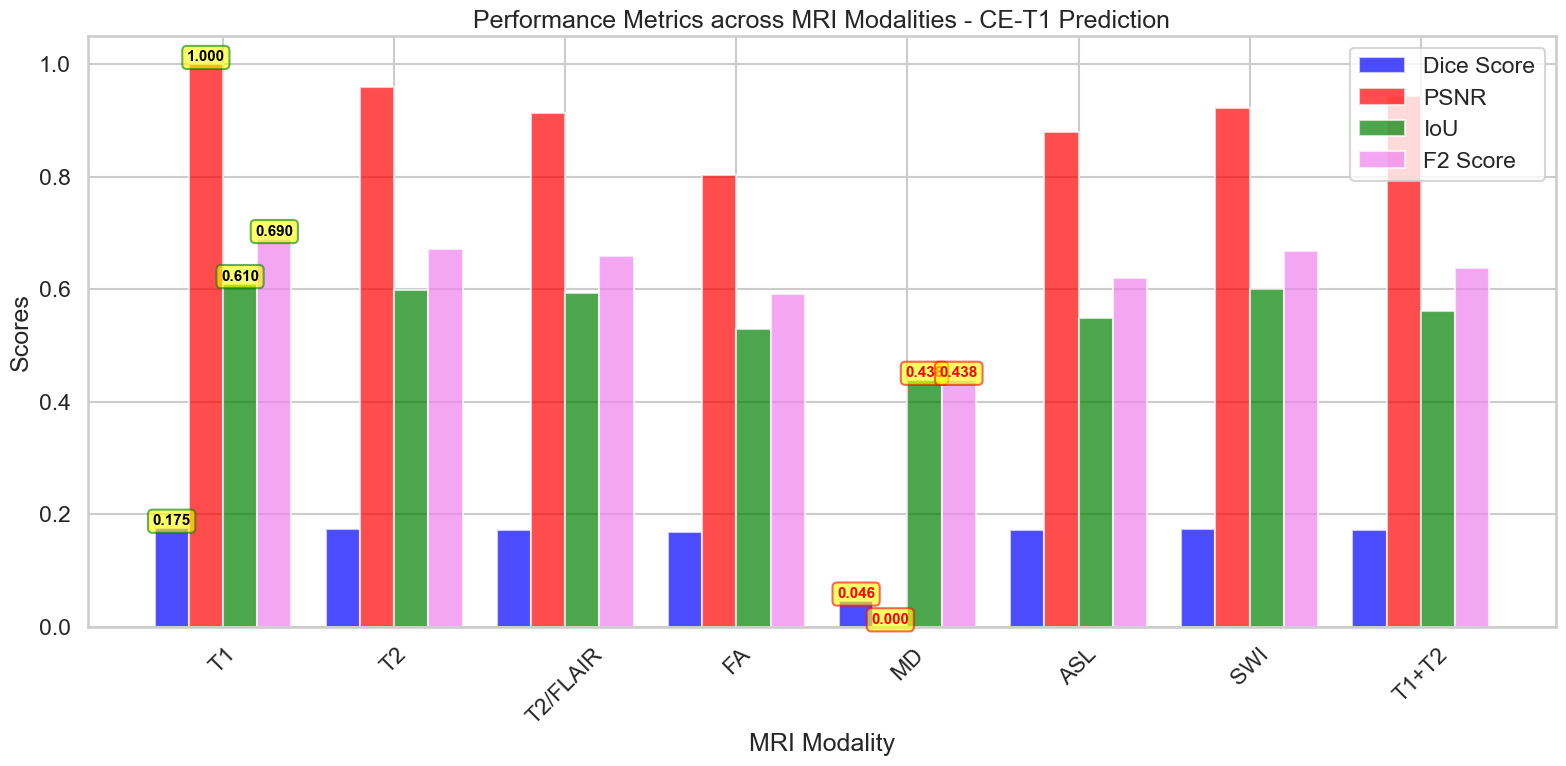

In [50]:
# Define data
labels = ["T1", "T2", "T2/FLAIR", "FA", "MD", "ASL", "SWI", "T1+T2"]

dice_scores = [0.175352216, 0.173564374, 0.172662511, 0.169296578, 
               0.045757707, 0.17280668, 0.173397347, 0.172645465]

psnr_scores = [37.87544958, 37.26330605, 36.55746932, 34.87678675, 
               22.61133848, 36.05473999, 36.70397357, 37.01074258]

iou_scores = [0.610364363, 0.599253392, 0.593691238, 0.529713129,
              0.438372093, 0.549396571, 0.600534522, 0.560911109]

f2_scores = [0.690456119, 0.672194911, 0.660000497, 0.592678406, 
             0.438372093, 0.62091422, 0.668910874, 0.637818696]

# Normalize PSNR scores (for visualisation purposes) - you might want to adjust this
psnr_scores = [(x-min(psnr_scores))/(max(psnr_scores)-min(psnr_scores)) for x in psnr_scores]

# Determine best and worst indices for each metric
best_dice, worst_dice = np.argmax(dice_scores), np.argmin(dice_scores)
best_psnr, worst_psnr = np.argmax(psnr_scores), np.argmin(psnr_scores)
best_iou, worst_iou = np.argmax(iou_scores), np.argmin(iou_scores)
best_f2, worst_f2 = np.argmax(f2_scores), np.argmin(f2_scores)

# Set the bar width and positions
bar_width = 0.2
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(16, 8))

# Create bars for Dice Score and PSNR
bars1 = ax.bar(index, dice_scores, bar_width, label='Dice Score', color='blue', alpha=0.7)
bars2 = ax.bar(index + bar_width, psnr_scores, bar_width, label='PSNR', color='red', alpha=0.7)
bars3 = ax.bar(index + 2*bar_width, iou_scores, bar_width, label='IoU', color='green', alpha=0.7)
bars4 = ax.bar(index + 3*bar_width, f2_scores, bar_width, label='F2 Score', color='violet', alpha=0.7)

# Function to annotate bars with best/worst values
def annotate_bars(bars, best_idx, worst_idx, values):
    ax.text(bars[best_idx].get_x() + bars[best_idx].get_width()/2., 
            bars[best_idx].get_height(),
            '{:.3f}'.format(values[best_idx]),
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black', bbox=dict(boxstyle='round', 
                                                                                               facecolor='yellow', edgecolor='green', 
                                                                                               alpha=0.6))
    
    ax.text(bars[worst_idx].get_x() + bars[worst_idx].get_width()/2., 
            bars[worst_idx].get_height(),
            '{:.3f}'.format(values[worst_idx]),
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='red', bbox=dict(boxstyle='round', 
                                                                                             facecolor='yellow', edgecolor='red', 
                                                                                             alpha=0.6))

# Apply the annotation function
annotate_bars(bars1, best_dice, worst_dice, dice_scores)
annotate_bars(bars2, best_psnr, worst_psnr, psnr_scores)
annotate_bars(bars3, best_iou, worst_iou, iou_scores)
annotate_bars(bars4, best_f2, worst_f2, f2_scores)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('MRI Modality')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics across MRI Modalities - CE-T1 Prediction')
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()